<a href="https://colab.research.google.com/github/fachruddinruddin/Project/blob/main/Klasifikasi_Film_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load dataset IMDB
data = pd.read_csv('imdb.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Preprocessing data
# Mengubah label sentimen menjadi numerik (0 untuk negatif, 1 untuk positif)
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
# Memisahkan data teks (ulasan) dan label sentimen
X = data['review']
y = data['sentiment']

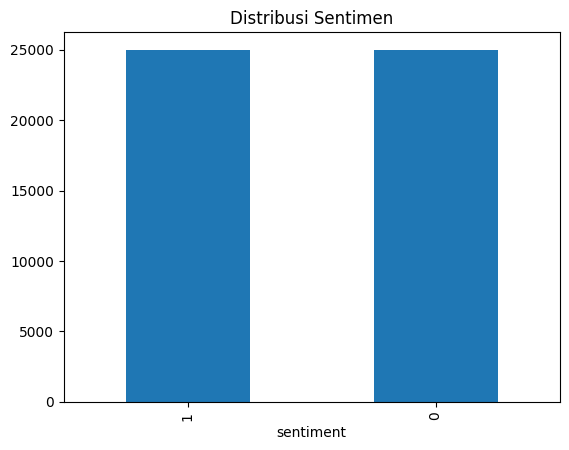

In [ ]:
# Visualisasi data
data['sentiment'].value_counts().plot(kind='bar', title='Distribusi Sentimen')
plt.show()

In [ ]:
# Memecah data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Memodelkan atau memanggil model SVM
model = LinearSVC()
model.fit(X_train_vectorized, y_train)

LinearSVC()

In [ ]:
# Mengevaluasi model
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model:', accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Akurasi model: 0.8382
Confusion Matrix:
 [[4198  763]
 [ 855 4184]]


In [ ]:
# Test atau simulasi
new_review = "This movie was amazing! The acting, plot, and cinematography were all top-notch."
new_review_vectorized = vectorizer.transform([new_review])
sentiment = model.predict(new_review_vectorized)
print('Sentimen ulasan baru:', 'positif' if sentiment[0] == 1 else 'negatif')

Sentimen ulasan baru: positif
